source url: https://cds.climate.copernicus.eu/datasets/insitu-gridded-observations-global-and-regional?tab=download

In [1]:
import xarray as xr
import rioxarray as rxr
import numpy as np
import codebase

In [2]:
year_str = '2020'
fp = '../..'
print('Started on', year_str, fp)

Started on 2020 ../..


In [5]:
test = xr.open_dataarray('/global/home/users/ann_scheliga/scratch/era5_test_data/2023daily_precip_type.nc')
test

<xarray.DataArray 'tp' (valid_time: 364, latitude: 321, longitude: 1440)>
[168255360 values with dtype=float32]
Coordinates:
    number      int64 ...
  * latitude    (latitude) float64 40.0 39.75 39.5 39.25 ... -39.5 -39.75 -40.0
  * longitude   (longitude) float64 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * valid_time  (valid_time) datetime64[ns] 2023-01-02 2023-01-03 ... 2023-12-31
Attributes: (12/32)
    GRIB_paramId:                             228
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      462240
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            accum
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               m
    long_name:                                Total precipitation
    units:                                    m
    standard_name:                            unknown
    GRIB_surface:                             0.0

In [22]:
int('2012')

2012

## Testing with GRDC subsetGPD

In [14]:
# Load GRDC data
grdc_id = 4152050
grdc_dir = '/global/scratch/users/ann_scheliga/aux_dam_datasets/GRDC_CRB/'
watershed_gpd, grdc_Q = codebase.load_data.load_GRDC_station_data_by_ID(grdc_id,filepath=grdc_dir)

In [15]:
metdatadir = '/global/scratch/users/ann_scheliga/era5_test_data/'
input_regex = r'daily_tempK'

In [16]:
files_OI = codebase.utils.grab_matching_names_from_filepath(metdatadir,input_regex)

In [18]:
files_OI

['2019daily_tempK.nc',
 '2020daily_tempK.nc',
 '2021daily_tempK.nc',
 '2022daily_tempK.nc',
 '2023daily_tempK.nc']

In [19]:
concat_dict = {'dim':'valid_time'}
test_concat = codebase.area_subsets.era5_shape_subset_and_concat(ordered_filenames=files_OI,
                                                                 filepath=metdatadir,
                                                                 concat_dict=concat_dict,
                                                                subset_gpd=watershed_gpd)

Grabbed lat/lon dims. Consider reprojecting!
Grabbed lat/lon dims. Consider reprojecting!
Grabbed lat/lon dims. Consider reprojecting!
Grabbed lat/lon dims. Consider reprojecting!
Grabbed lat/lon dims. Consider reprojecting!


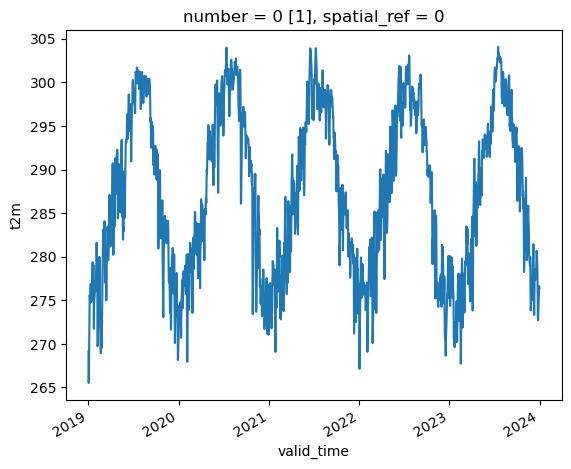

In [32]:
test_concat.mean(dim=['latitude','longitude']).plot()

In [3]:
# Purpose: check out the areal_agg function to write tests
import pandas as pd
import codebase
from codebase import testing

grdc_id = 4152600
grdc_dir = "/global/scratch/users/ann_scheliga/aux_dam_datasets/GRDC_CRB/"
met_dir = "/global/scratch/users/ann_scheliga/era5_test_data/"
res_dir = "/global/scratch/users/ann_scheliga/CYGNSS_daily/"
import numpy as np
codebase.load_data.load_GRanD()

## import GRDC
watershed_gpd, grdc_Q = codebase.load_data.load_GRDC_station_data_by_ID(
    grdc_id,
    filepath=grdc_dir,
    timeseries_dict={"start_year": 2019, "stop_year": 2024},
)

precip_files = codebase.utils.grab_matching_names_from_filepath(
        met_dir, r"daily_tot_precip"
    )

concat_dict = {"dim": "valid_time"}

precip_xr = codebase.area_subsets.era5_shape_subset_and_concat(
        ordered_filenames=precip_files,
        filepath=met_dir,
        concat_dict=concat_dict,
        subset_gpd=watershed_gpd,
    )
precip_1dim = codebase.area_calcs.CYGNSS_001_areal_aggregation(
        np.nansum,
        precip_xr,
        x_dim="longitude",
        y_dim="latitude",
        with_index="valid_time",
    )

Grabbed lat/lon dims. Consider reprojecting!
Grabbed lat/lon dims. Consider reprojecting!
Grabbed lat/lon dims. Consider reprojecting!
Grabbed lat/lon dims. Consider reprojecting!
Grabbed lat/lon dims. Consider reprojecting!
Projected to equal area
